Extract tweets text from the cvs file:

In [ ]:
import csv
import pandas
import re

with open("scotus_tweets_2014-11-14.csv","r", encoding="utf8") as f:
    data=pandas.read_csv(f)
    for line in data.text:
        if 'scotus' or 'SCOTUS' or 'Scotus' in line:
            if '\n' in line:
                line=line.replace('\n',' ')
            line=re.sub(r'http\S+', '', line)
            with open('scotus_tweets_2014-11-14_text_2.txt','a',encoding="utf8") as the_file:
                 the_file.write(line+'\n')
the_file.close()
f.close()            

Counting the postive, negative and nuetral tweets, and save them to separated files:

In [2]:
import csv
import pandas
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

pos_count = 0
nue_count=0
neg_count=0
total_line=0
threshold = 0.0

with open("scotus_tweets_2014-11-14_text_2.txt","r", encoding="utf8") as f:
    for line in f.read().split('\n'):
        vs = analyzer.polarity_scores(line)
        if vs['compound'] > 0:
            pos_count += 1
            with open('positivefile.txt', 'a',encoding="utf8") as pos_file:
                 pos_file.write(line+'\n') 
        if vs['compound'] == 0:
            nue_count += 1
            with open('neutralfile.txt','a',encoding="utf8") as neu_file:
                 neu_file.write(line+'\n')
        if vs['compound']<0:
            neg_count += 1
            with open('negativefile.txt','a',encoding="utf8") as neg_file:
                 neg_file.write(line+'\n')                     
        total_line +=1
            
print("Positive tweets = {}% via {} samples".format(pos_count/total_line*100.0, total_line))
print("Negative tweets = {}% via {} samples".format(neg_count/total_line*100.0, total_line))
print("Nuetral  tweets = {}% via {} samples".format(nue_count/total_line*100.0, total_line))

Positive tweets = 39.93753253513795% via 9605 samples
Negative tweets = 24.74752732951588% via 9605 samples
Nuetral  tweets = 35.31494013534618% via 9605 samples


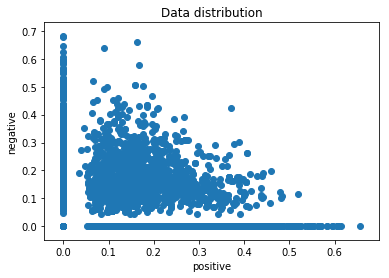

In [3]:
import csv
import pandas
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

analyzer = SentimentIntensityAnalyzer()
p_data=[]
n_data=[]

with open("scotus_tweets_2014-11-14_text_2.txt","r", encoding="utf8") as f:
    for line in f.read().split('\n'):
        vs = analyzer.polarity_scores(line)
        p_data.append(vs['pos'])
        n_data.append(vs['neg'])
f.close()

plt.scatter(p_data,n_data)

plt.xlabel('positive') 

plt.ylabel('negative') 
  
# giving a title to my graph 
plt.title('Data distribution') 
  
# function to show the plot 
plt.show() 



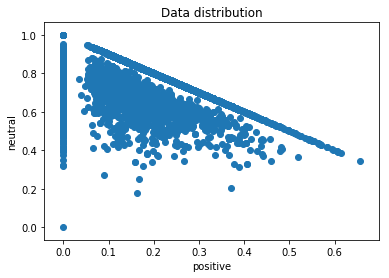

In [6]:
import csv
import pandas
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

analyzer = SentimentIntensityAnalyzer()
p_data=[]
neu_data=[]

with open("scotus_tweets_2014-11-14_text_2.txt","r", encoding="utf8") as f:
    for line in f.read().split('\n'):
        vs = analyzer.polarity_scores(line)
        p_data.append(vs['pos'])
        neu_data.append(vs['neu'])
f.close()

plt.scatter(p_data,neu_data)

plt.xlabel('positive') 

plt.ylabel('neutral') 
  
# giving a title to my graph 
plt.title('Data distribution') 
  
# function to show the plot 
plt.show() 



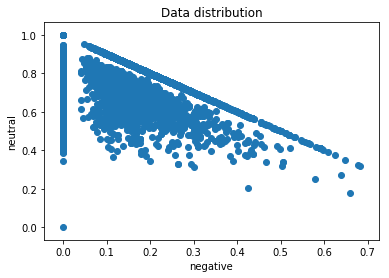

In [7]:
import csv
import pandas
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

analyzer = SentimentIntensityAnalyzer()
neg_data=[]
n_data=[]

with open("scotus_tweets_2014-11-14_text_2.txt","r", encoding="utf8") as f:
    for line in f.read().split('\n'):
        vs = analyzer.polarity_scores(line)
        neg_data.append(vs['neg'])
        n_data.append(vs['neu'])
f.close()

plt.scatter(neg_data,n_data)

plt.xlabel('negative') 

plt.ylabel('neutral') 
  
# giving a title to my graph 
plt.title('Data distribution') 
  
# function to show the plot 
plt.show() 

